C:\Users\Himanshu Sardana\AppData\Local\Temp\ipykernel_5640\545086999.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2023-01-01", periods=24, freq='M')


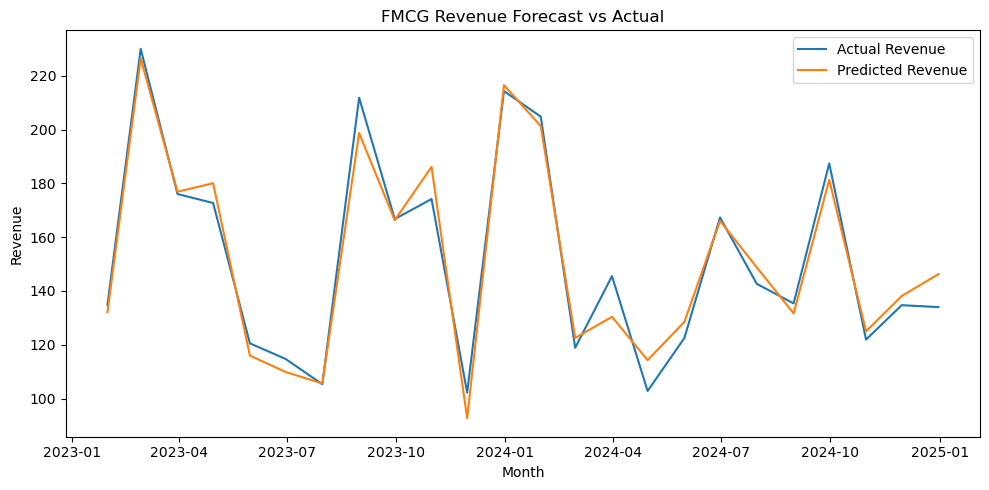

R-squared: 0.96
Mean Squared Error: 50.68


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create Synthetic Dataset
np.random.seed(42)
months = pd.date_range(start="2023-01-01", periods=24, freq='M')
data = pd.DataFrame({
    "Month": months,
    "Marketing_Spend": np.random.uniform(50, 200, size=24),
    "Promotion_Flag": np.random.choice([0, 1], size=24),
    "Season": np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=24),
    "Product_Category": np.random.choice(['A', 'B', 'C'], size=24),
    "Channel": np.random.choice(['Online', 'Retail', 'Distributor'], size=24),
})

# Simulate Revenue based on influencing features
data["Revenue"] = (
    50 +
    0.8 * data["Marketing_Spend"] +
    15 * data["Promotion_Flag"] +
    np.random.normal(0, 10, size=24)
)

# Step 2: Feature Engineering
data_encoded = pd.get_dummies(data.drop(columns=["Month"]), drop_first=True)

# Step 3: Train Model
X = data_encoded.drop("Revenue", axis=1)
y = data_encoded["Revenue"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Step 4: Evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Step 5: Visualization
plt.figure(figsize=(10,5))
sns.lineplot(x=months, y=y, label='Actual Revenue')
sns.lineplot(x=months, y=y_pred, label='Predicted Revenue')
plt.title("FMCG Revenue Forecast vs Actual")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()

# Print Results
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")